<a href="https://colab.research.google.com/github/AbnerSilvaBarbosa/DIO-IA/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

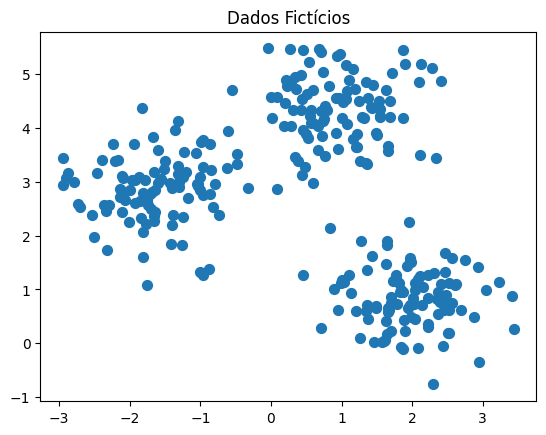

In [20]:
# Gerar uma base de dados fictícia com 3 centros
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# Definir o número de clusters (K)
K = 3

# Inicializar centróides aleatoriamente
np.random.seed(42)
initial_centroids = X[np.random.choice(X.shape[0], K, replace=False)]

# Visualizar a base de dados
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Dados Fictícios")
plt.show()

In [21]:
# Função para calcular a distância euclidiana
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Função para atribuir cada ponto ao centróide mais próximo
def assign_clusters(X, centroids):
    clusters = []
    for point in X:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)

# Função para calcular novos centróides como a média dos pontos em cada cluster
def calculate_centroids(X, clusters, K):
    centroids = []
    for k in range(K):
        cluster_points = X[clusters == k]
        if len(cluster_points) > 0:
            centroid = cluster_points.mean(axis=0)
        else:
            centroid = X[np.random.choice(X.shape[0], 1)]
        centroids.append(centroid)
    return np.array(centroids)

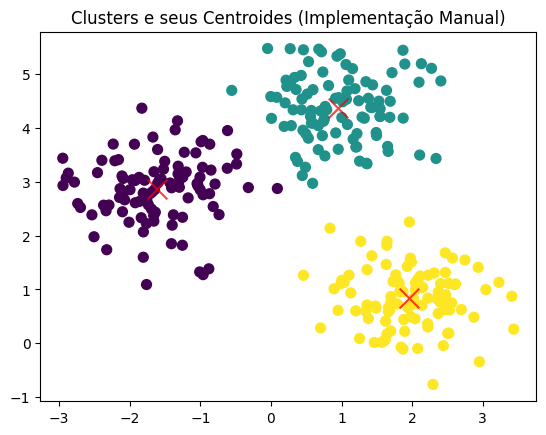

In [22]:
# Iterar até os centróides estabilizarem
max_iters = 100
centroids = initial_centroids
for i in range(max_iters):
    old_centroids = centroids
    clusters = assign_clusters(X, centroids)
    centroids = calculate_centroids(X, clusters, K)
    if np.all(old_centroids == centroids):
        break

# Visualizar os resultados finais
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='x')
plt.title("Clusters e seus Centroides (Implementação Manual)")
plt.show()

In [24]:
# Treinar o modelo K-Means com os centróides ajustados manualmente
kmeans = KMeans(n_clusters=K, init=centroids, n_init=1, max_iter=100)
kmeans.fit(X)

# Predizer os clusters com o modelo treinado
y_kmeans = kmeans.predict(X)

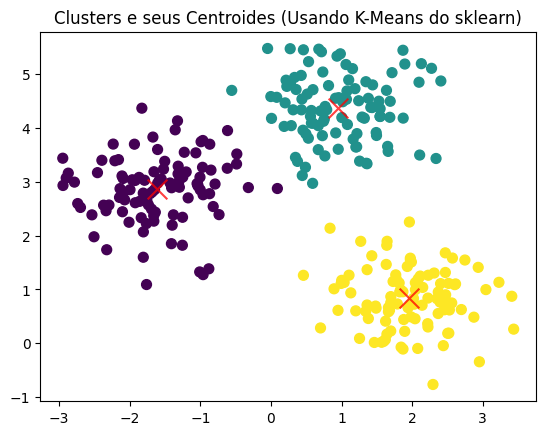

In [25]:
# Visualizar os resultados
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, marker='x')
plt.title("Clusters e seus Centroides (Usando K-Means do sklearn)")
plt.show()